(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

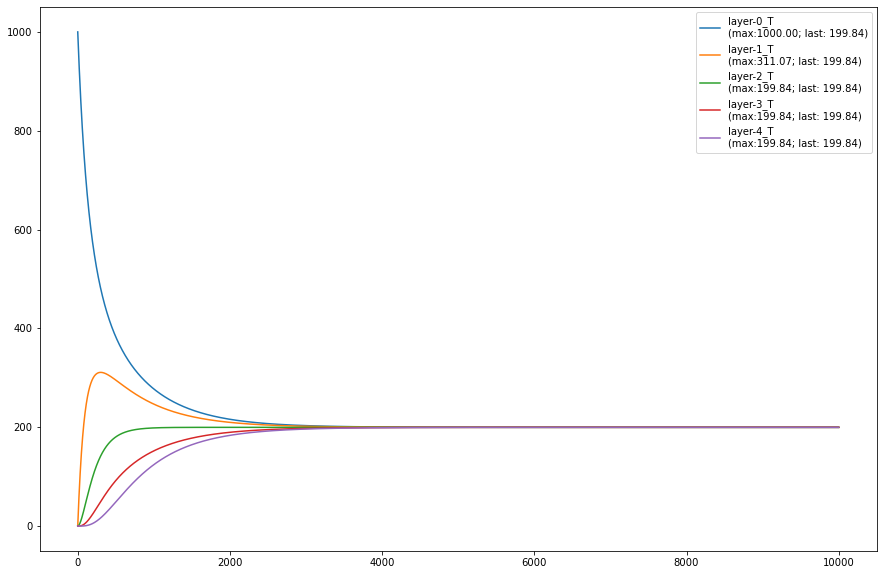

In [1]:
from boxmodel import BoxModel

material = { # uses the values for granite
  'c' : 790, # heat capacity
  'k' : 3.2  # thermal concuctivity
}

# this performs thermal conduction between two layers
def get_conduction(t1,t2,k1,k2,c1,c2):
    nablaT = t2 - t1       # temperature gradient
    k = ( k1 + k2 ) / 2    # mean heat capacity
    mean_c = ( c1 + c2 )/2 # mean conducticity
    return k*nablaT/mean_c

n_layer = 5
model = BoxModel(step=(10000,1))

plotlist=[] 
for i in range(n_layer):
    layer_name = f'layer-{i}'
    plotlist.append(layer_name+'_T')
# identical layers
    model.add_box(layer_name, {'T': 0.0, 'c': material['c'], 'k': material['k']})

# initial disturbance: uppermost layer is hotter
model.ref('layer-0_T').set(1000)

for i in range(n_layer - 1):
    l1 = f'layer-{i}'
    l2 = f'layer-{i+1}'
# layers connected by thermal conduction
    model.boxes[l1].add_process('heat transfer', 'T', get_conduction, 
                                           [ model.ref(l1+'_T'), model.ref(l2+'_T'),
                                             model.ref(l1+'_k'), model.ref(l2+'_k'),
                                             model.ref(l1+'_c'), model.ref(l2+'_c')
                                           ])
    model.boxes[l2].add_process('heat transfer2', 'T', get_conduction, 
                                           [ model.ref(l1+'_T'), model.ref(l2+'_T'),
                                             model.ref(l1+'_k'), model.ref(l2+'_k'),
                                             model.ref(l1+'_c'), model.ref(l2+'_c')
                                           ], sign='minus')

model.run()
model.plot(plotlist)


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

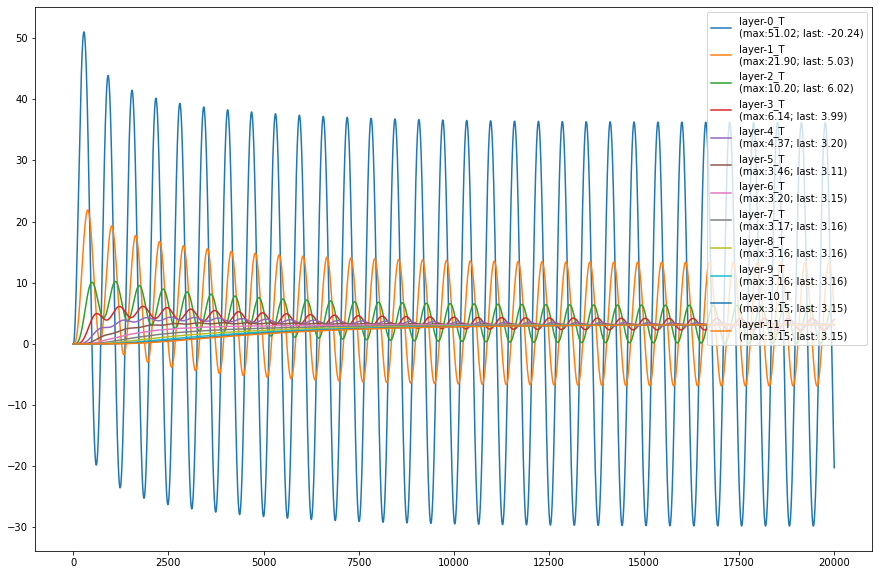

In [6]:
import numpy as np

material = { # uses the values for granite
  'c' : 790, # heat capacity
  'k' : 3.2  # thermal concuctivity
}

# this performs thermal conduction between two layers
def get_conduction(t1,t2,k1,k2,c1,c2):
    nablaT = t2 - t1       # temperature gradient
    k = ( k1 + k2 ) / 2    # mean heat capacity
    mean_c = ( c1 + c2 )/2 # mean conducticity
    return k*nablaT/mean_c

def insolation(t, c):
    return 300 / c

def insolation(t, c):
    return np.sin(t/100) * 300 / c

def black_body(t):
    # print(t)
    t4 = t**4
    sigma = 5.67e-8 # W m-2 K-4
    return t4 * sigma

# model = BoxModel(step=(15000,1))
model = BoxModel(step=(20000,1))
n_layer = 12

plotlist=[] 
for i in range(n_layer):
    layer_name = f'layer-{i}'
    plotlist.append(layer_name+'_T')
# identical layers
    model.add_box(layer_name, {'T': 0.0, 'c': material['c'], 'k': material['k']})

for i in range(n_layer - 1):
    l1 = f'layer-{i}'
    l2 = f'layer-{i+1}'
# layers connected by thermal conduction
    model.boxes[l1].add_process('heat transfer', 'T', get_conduction, 
                                           [ model.ref(l1+'_T'), model.ref(l2+'_T'),
                                             model.ref(l1+'_k'), model.ref(l2+'_k'),
                                             model.ref(l1+'_c'), model.ref(l2+'_c')
                                           ])
    model.boxes[l2].add_process('heat transfer2', 'T', get_conduction, 
                                           [ model.ref(l1+'_T'), model.ref(l2+'_T'),
                                             model.ref(l1+'_k'), model.ref(l2+'_k'),
                                             model.ref(l1+'_c'), model.ref(l2+'_c')
                                           ], sign='minus')

# periodical heating (and cooling) of the surface layer
model.boxes['layer-0'].add_process('insolation','T', insolation, [model.current_time, model.ref('layer-0_c')])
# outgoing radiation from surface layer:
# model.boxes['layer-0'].add_process('black_body','T', black_body, [model.ref('layer-0_T')], sign='-')
    
model.run()
model.plot(plotlist)